## WEEK 01

# **Credit Score Classification Model Development**

### **`Aim`** :The aim of this internship project is to create a predictive model that categorizes customers into three creditworthiness levels: Good, Standard, and Poor.


Importing neceesary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

Loading the data set

In [5]:
data=pd.read_csv('/content/credit.csv')

## **EDA**

In [6]:
data

ID  Customer_ID  Month           Name   Age          SSN  \
0        5634         3392      1  Aaron Maashoh  23.0  821000265.0   
1        5635         3392      2  Aaron Maashoh  23.0  821000265.0   
2        5636         3392      3  Aaron Maashoh  23.0  821000265.0   
3        5637         3392      4  Aaron Maashoh  23.0  821000265.0   
4        5638         3392      5  Aaron Maashoh  23.0  821000265.0   
...       ...          ...    ...            ...   ...          ...   
99995  155625        37932      4          Nicks  25.0   78735990.0   
99996  155626        37932      5          Nicks  25.0   78735990.0   
99997  155627        37932      6          Nicks  25.0   78735990.0   
99998  155628        37932      7          Nicks  25.0   78735990.0   
99999  155629        37932      8          Nicks  25.0   78735990.0   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                3.0   
1      Scientist       19114.12            1824.843333                3.0   
2      Scientist       19114.12            1824.843333                3.0   
3      Scientist       19114.12            1824.843333                3.0   
4      Scientist       19114.12            1824.843333                3.0   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                4.0   
99996   Mechanic       39628.99            3359.415833                4.0   
99997   Mechanic       39628.99            3359.415833                4.0   
99998   Mechanic       39628.99            3359.415833                4.0   
99999   Mechanic       39628.99            3359.415833                4.0   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                  265.0                     No            49.574949   
1                  266.0                     No            49.574949   
2                  267.0                     No            49.574949   
3                  268.0                     No            49.574949   
4                  269.0                     No            49.574949   
...                  ...                    ...                  ...   
99995              378.0                     No            35.104023   
99996              379.0                     No            35.104023   
99997              380.0                     No            35.104023   
99998              381.0                     No            35.104023   
99999              382.0                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    21.465380   High_spent_Small_value_payments   
1                    21.465380    Low_spent_Large_value_payments   
2                    21.465380   Low_spent_Medium_value_payments   
3                    21.465380    Low_spent_Small_value_payments   
4                    21.465380  High_spent_Medium_value_payments   
...                        ...                               ...   
99995                24.028477   High_spent_Large_v

In [7]:
data.head()

ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \
0            809.98                 26.822620              265.0   
1            809.98                 31.944960              266.0   
2            809.98                 28.609352              267.0   
3            809.98                 31.377862              268.0   
4            809.98                 24.797347              269.0   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                     No            49.574949                 21.46538   
1                     No            49.574949                 21.46538   
2                     No            49.574949                 21.46538   
3                     No            49.574949                 21.46538   
4                     No            49.574949                 21.46538   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments      312.494089          Good  
1    Low_spent_Large_value_payments      284.629162          Good  
2   Low_spent_Medium_value_payments      331.209863          Good  
3    Low_spent_Small_value_payments      223.451310          Good  
4  High_spent_Medium_value_payments      341.489231          Good  

[5 rows x 28 columns]

In [8]:
data.tail()

ID  Customer_ID  Month   Name   Age         SSN Occupation  \
99995  155625        37932      4  Nicks  25.0  78735990.0   Mechanic   
99996  155626        37932      5  Nicks  25.0  78735990.0   Mechanic   
99997  155627        37932      6  Nicks  25.0  78735990.0   Mechanic   
99998  155628        37932      7  Nicks  25.0  78735990.0   Mechanic   
99999  155629        37932      8  Nicks  25.0  78735990.0   Mechanic   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
99995       39628.99            3359.415833                4.0  ...   
99996       39628.99            3359.415833                4.0  ...   
99997       39628.99            3359.415833                4.0  ...   
99998       39628.99            3359.415833                4.0  ...   
99999       39628.99            3359.415833                4.0  ...   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
99995        Good            502.38                 34.663572   
99996        Good            502.38                 40.565631   
99997        Good            502.38                 41.255522   
99998        Good            502.38                 33.638208   
99999        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
99995              378.0                     No            35.104023   
99996              379.0                     No            35.104023   
99997              380.0                     No            35.104023   
99998              381.0                     No            35.104023   
99999              382.0                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
99995                24.028477   High_spent_Large_value_payments   
99996                24.028477  High_spent_Medium_value_payments   
99997                24.028477   High_spent_Large_value_payments   
99998                24.028477    Low_spent_Large_value_payments   
99999                24.028477  High_spent_Medium_value_payments   

      Monthly_Balance  Credit_Score  
99995      479.866228          Poor  
99996      496.651610          Poor  
99997      516.809083          Poor  
99998      319.164979      Standard  
99999      393.673696          Poor  

[5 rows x 28 columns]

**Dataset description**

ID: Represents a unique identification of an entry

Customer_ID: Represents a unique identification of a person

Month: Represents the month of the year

Name: Represents the name of a person

Age: Represents the age of the person

SSN: Represents the social security number of a person

Occupation: Represents the occupation of the person

Annual_Income: Represents the annual income of the person

Monthly_Inhand_Salary: Represents the monthly base salary of a person

Num_Bank_Accounts: Represents the number of bank accounts a person holds

Num_Credit_Card: Represents the number of other credit cards held by a person

Interest_Rate: Represents the interest rate on credit card

Num_of_Loan: Represents the number of loans taken from the bank

Type_of_Loan: Represents the types of loan taken by a person

Delay_from_due_date: Represents the average number of days delayed from the payment date

Num_of_Delayed_Payment: Represents the average number of payments delayed by a person

Changed_Credit_Limit: Represents the percentage change in credit card limit

Num_Credit_Inquiries: Represents the number of credit card inquiries

Credit_Mix: Represents the classification of the mix of credits

Outstanding_Debt: Represents the remaining debt to be paid

Credit_Utilization_Ratio: Represents the utilization ratio of credit card

Credit_History_Age: Represents the age of credit history of the person

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person

Total_EMI_per_month: Represents the monthly EMI payments

Amount_invested_monthly: Represents the monthly amount invested by the customer

Payment_Behaviour: Represents the payment behavior of the customer

Monthly_Balance: Represents the monthly balance amount of the customer

Credit_Score: Represents the credit score of the customer (Poor, Standard, Good)

In [9]:
data.shape

(100000, 28)

In [10]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [11]:
#DISPLAY THE FULL SUMMARY OF THE DATASET
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [12]:
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [13]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### its clear that data doesn't contain any missing value

In [14]:
#STATISTICAL SUMMARY OF THE GIVEN DATASET.
data.describe()

ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.316340   
std     43301.486619   14340.543051       2.291299      10.764812   
min      5634.000000    1006.000000       1.000000      14.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      56.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50505.123449            4197.270835           5.368820   
std    2.908267e+08   38299.422093            3186.432497           2.593314   
min    8.134900e+04    7005.930000             303.645417           0.000000   
25%    2.451686e+08   19342.972500            1626.594167           3.000000   
50%    5.006886e+08   36999.705000            3095.905000           5.000000   
75%    7.560027e+08   71683.470000            5957.715000           7.000000   
max    9.999934e+08  179987.280000           15204.633333          11.000000   

       Num_Credit_Card  Interest_Rate  ...  Delay_from_due_date  \
count    100000.000000   100000.00000  ...         100000.00000   
mean          5.533570       14.53208  ...             21.08141   
std           2.067098        8.74133  ...             14.80456   
min           0.000000        1.00000  ...              0.00000   
25%           4.000000        7.00000  ...             10.00000   
50%           5.000000       13.00000  ...             18.00000   
75%           7.000000       20.00000  ...             28.00000   
max          11.000000       34.00000  ...             62.00000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count           100000.000000         100000.000000         100000.000000   
mean                13.313120             10.470323              5.798250   
std                  6.237166              6.609481              3.867826   
min                  0.000000              0.500000              0.000000   
25%                  9.000000              5.380000              3.000000   
50%                 14.000000              9.400000              5.000000   
75%                 18.000000             14.850000              8.000000   
max                 25.000000             29.980000             17.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count     100000.000000             100000.000000       100000.000000   
mean        1426.220376                 32.285173          221.220460   
std         1155.129026                  5.116875           99.680716   
min            0.230000                 20.000000            1.000000   
25%          566.072500                 28.052567          144.000000   
50%         1166.155000                 32.305784          219.000000   
75%         1945.962500                 36.496663          302.000000   
max         4998.070000                 50.000000          404.000000   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count        100000.000000            100000.000000    100000.000000  
mean            107.699208                55.101315       392.697586  
std             132.267056                39.006932       201.652719  
min               0.000000                 0.000000         0.007760  
25%              29.268886                27.959111       267.615983  
50%              66.462304                45.156550       333.865366  
75%             147.392573                71.295797       463.215683  
max            1779.103254               434.191089      1183.930696  

[8 rows x 21 columns]

In [15]:
data.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

### Checking whether duplicate values present or not in the data set

In [16]:
data.duplicated().sum()

0

In [17]:
data.duplicated().value_counts()

False    100000
Name: count, dtype: int64

### No duplicate values present

In [18]:
data.isnull().sum().reset_index().rename(columns={'index':'feature_names ',0:'null_count'})

feature_names   null_count
0                         ID           0
1                Customer_ID           0
2                      Month           0
3                       Name           0
4                        Age           0
5                        SSN           0
6                 Occupation           0
7              Annual_Income           0
8      Monthly_Inhand_Salary           0
9          Num_Bank_Accounts           0
10           Num_Credit_Card           0
11             Interest_Rate           0
12               Num_of_Loan           0
13              Type_of_Loan           0
14       Delay_from_due_date           0
15    Num_of_Delayed_Payment           0
16      Changed_Credit_Limit           0
17      Num_Credit_Inquiries           0
18                Credit_Mix           0
19          Outstanding_Debt           0
20  Credit_Utilization_Ratio           0
21        Credit_History_Age           0
22     Payment_of_Min_Amount           0
23       Total_EMI_per_month           0
24   Amount_invested_monthly           0
25         Payment_Behaviour           0
26           Monthly_Balance           0
27              Credit_Score           0

## Checking unique values

In [19]:
data['Age'].unique()


array([23., 28., 34., 54., 55., 21., 31., 33., 30., 24., 44., 45., 40.,
       41., 32., 35., 36., 39., 37., 20., 46., 26., 42., 19., 48., 38.,
       43., 22., 16., 18., 15., 27., 25., 14., 17., 47., 53., 56., 29.,
       49., 51., 50., 52.])

In [20]:
data['Age'].value_counts()

Age
38.0    3070
28.0    3045
31.0    3037
26.0    3025
32.0    2969
36.0    2953
25.0    2952
27.0    2951
35.0    2940
39.0    2927
34.0    2922
44.0    2902
22.0    2890
19.0    2875
41.0    2865
20.0    2833
37.0    2832
29.0    2823
43.0    2809
30.0    2807
21.0    2792
24.0    2789
23.0    2719
45.0    2712
40.0    2695
42.0    2643
33.0    2623
18.0    2427
46.0    1670
15.0    1615
17.0    1551
16.0    1505
49.0    1419
48.0    1416
55.0    1395
53.0    1394
52.0    1388
54.0    1342
51.0    1332
50.0    1305
47.0    1265
14.0    1197
56.0     379
Name: count, dtype: int64

In [21]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [22]:
data['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

In [23]:
data['Monthly_Inhand_Salary'].unique()

array([ 1824.84333333,  3037.98666667, 12187.22      , ...,
        3097.00833333,  1929.90666667,  3359.41583333])

In [24]:
data['Monthly_Inhand_Salary'].value_counts()

Monthly_Inhand_Salary
6769.130000     16
6639.560000     16
2295.058333     16
6082.187500     16
6358.956667     16
                ..
1056.522397      1
1573.927963      1
4722.318333      1
611.734883       1
10823.060062     1
Name: count, Length: 13241, dtype: int64

In [25]:
data['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [26]:
data['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [27]:
data['Num_Bank_Accounts'].unique()

array([ 3.,  2.,  1.,  7.,  4.,  0.,  8.,  5.,  6.,  9., 10., 11.])

In [28]:
data['Num_Bank_Accounts'].value_counts()

Num_Bank_Accounts
6.0     13175
7.0     12999
8.0     12940
4.0     12343
5.0     12298
3.0     12107
9.0      5503
10.0     5329
1.0      4540
0.0      4417
2.0      4340
11.0        9
Name: count, dtype: int64

In [29]:
data['Num_Credit_Card'].unique()

array([ 4.,  5.,  1.,  7.,  6.,  8.,  3.,  9.,  2., 10., 11.,  0.])

In [30]:
data['Num_Credit_Card'].value_counts()

Num_Credit_Card
5.0     18903
7.0     17024
6.0     16932
4.0     14362
3.0     13560
8.0      5073
10.0     4962
9.0      4753
2.0      2196
1.0      2185
11.0       36
0.0        14
Name: count, dtype: int64

In [31]:
data['Num_of_Loan'].unique()

array([4., 1., 3., 0., 2., 7., 5., 6., 8., 9.])

In [32]:
data['Num_of_Loan'].value_counts()

Num_of_Loan
3.0    15752
2.0    15712
4.0    15456
0.0    11408
1.0    11128
6.0     8144
7.0     7680
5.0     7528
9.0     3856
8.0     3336
Name: count, dtype: int64

In [33]:
data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [34]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [35]:
data['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [36]:
data['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [37]:
data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [38]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64

In [39]:
data['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [40]:
data['Type_of_Loan'].value_counts()

Type_of_Loan
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgage Loan, Debt Consolidation Loan, and Student Loan                                                                     8
Debt Consolidation Loan, Auto Loan, Personal Loan, Debt Consolidation Loan, Student Loan, and Credit-Builder Loan                         8
Student Loan, Auto Loan, Student Loan, Credit-Builder Loan, Home Equity Loan, Debt Consolidation Loan, and Debt Consolidation Loan        8
Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan                                                                   8
Name: count, Length: 6261, dtype: int64

In [41]:
data['Occupation'].nunique()

15

In [42]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [43]:
data['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

In [44]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64

# **DATA VISUALIZATION**

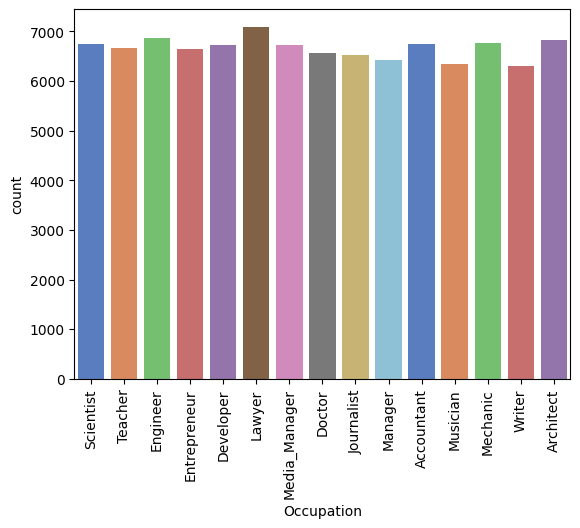

In [45]:
sns.countplot(x = data['Occupation'],palette = "muted")
plt.xticks(rotation = 90)
plt.show()
plt.figsize=(20,10)

([0, 1, 2], [Text(0, 0, 'Good'), Text(1, 0, 'Standard'), Text(2, 0, 'Poor')])

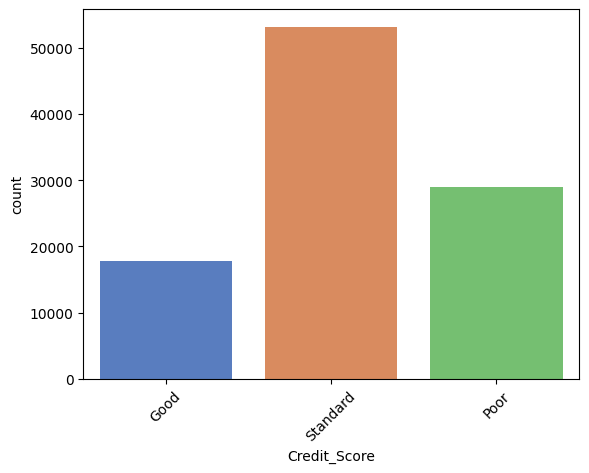

In [46]:
sns.countplot(x = data['Credit_Score'],palette = "muted");
plt.xticks(rotation = 45)

([0, 1, 2], [Text(0, 0, 'No'), Text(1, 0, 'NM'), Text(2, 0, 'Yes')])

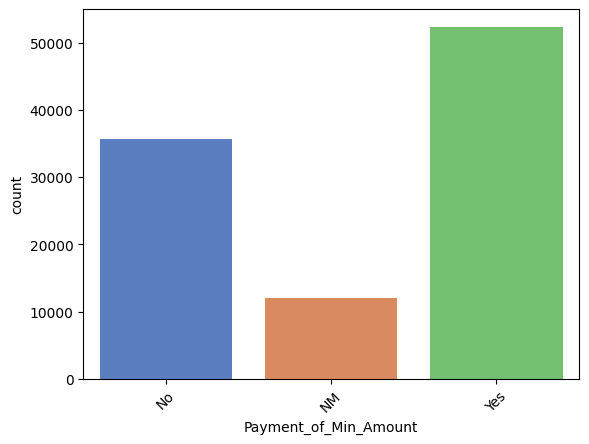

In [47]:
sns.countplot(x = data['Payment_of_Min_Amount'],palette = "muted");
plt.xticks(rotation = 45)

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Customer_ID'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Age'}>, <Axes: title={'center': 'SSN'}>],
       [<Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>],
       [<Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>],
       [<Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Ax

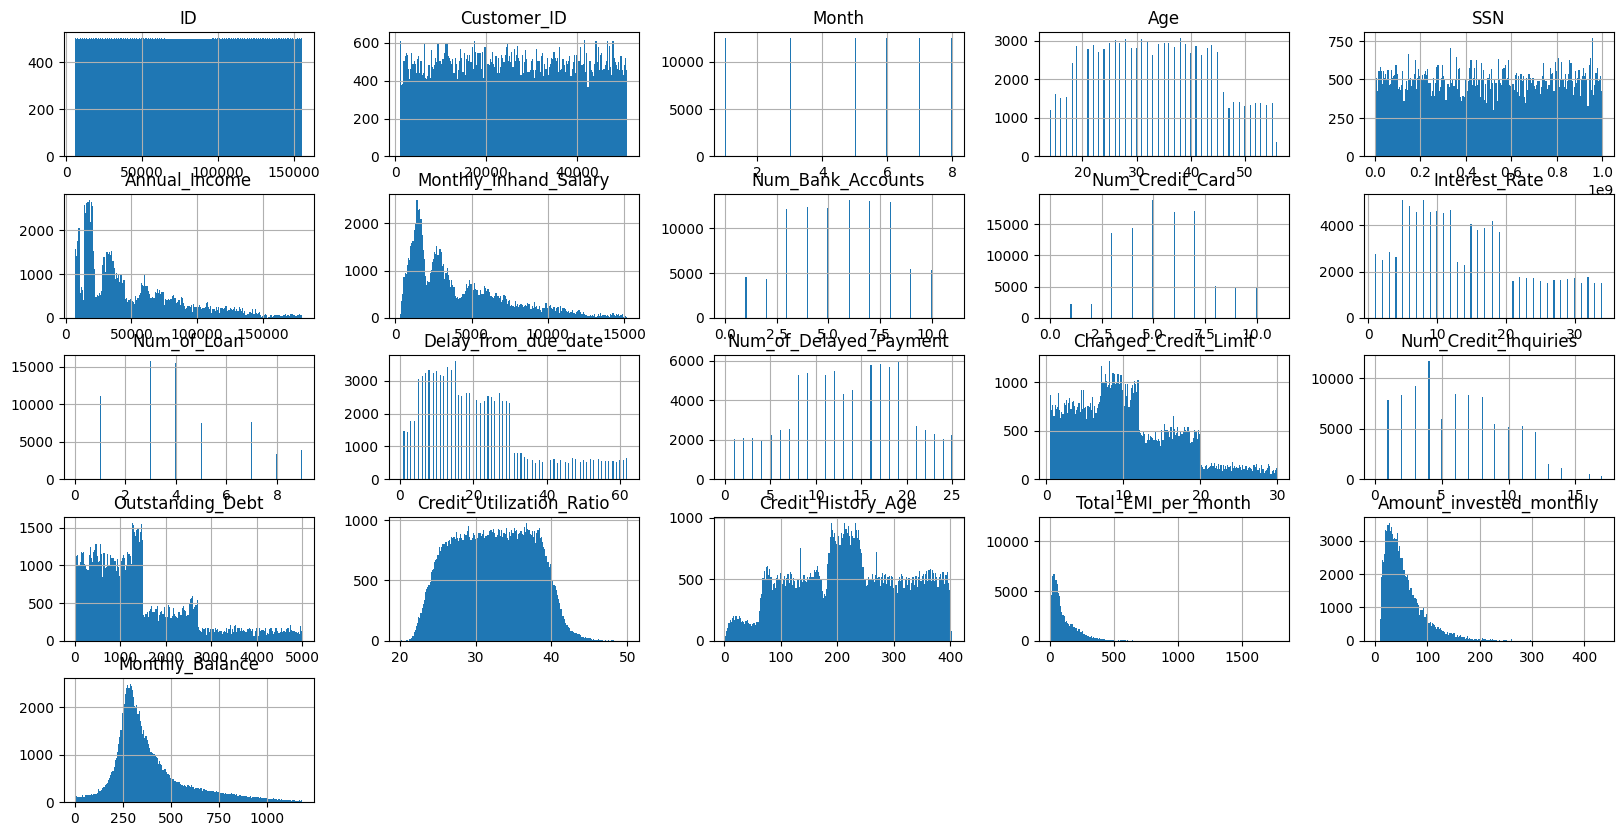

In [48]:
data.hist(bins=200,figsize=(20,10))



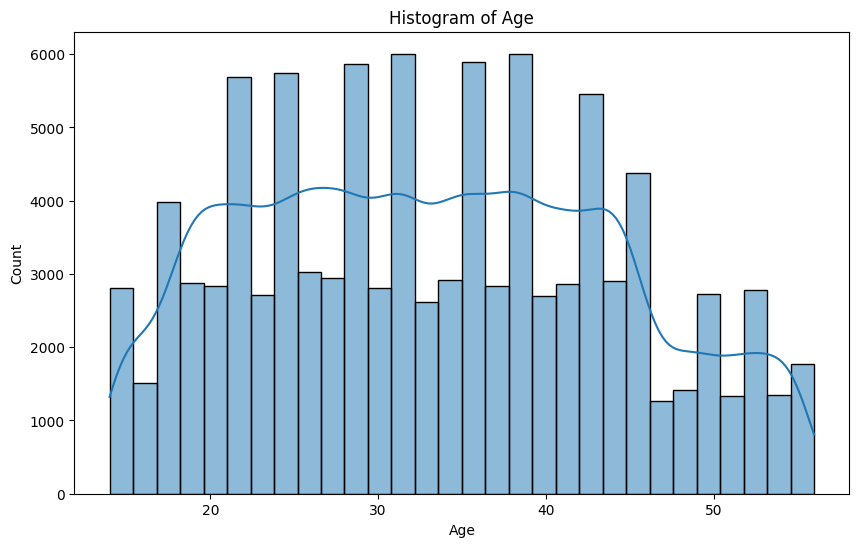

In [49]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

([0, 1, 2], [Text(0, 0, 'Good'), Text(1, 0, 'Standard'), Text(2, 0, 'Bad')])

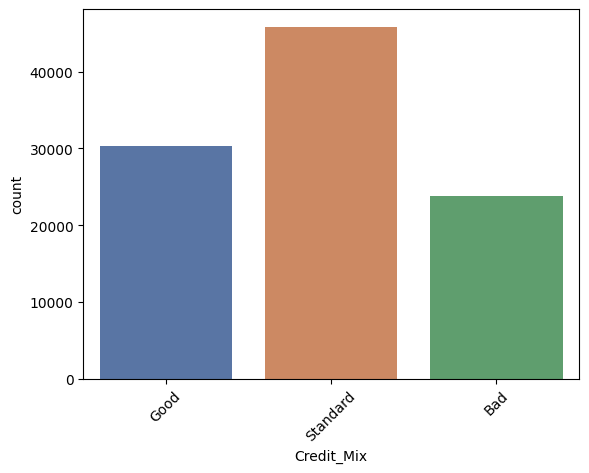

In [50]:
sns.countplot(x = data['Credit_Mix'],palette = "deep");
plt.xticks(rotation = 45)

##Count plots for categorical features

###Box plots for categorical features against the target variable 'Credit_Score'

In [51]:
def pie_plot(data, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        data[col].value_counts().plot(ax=ax, kind='pie', figsize=(10, 10), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

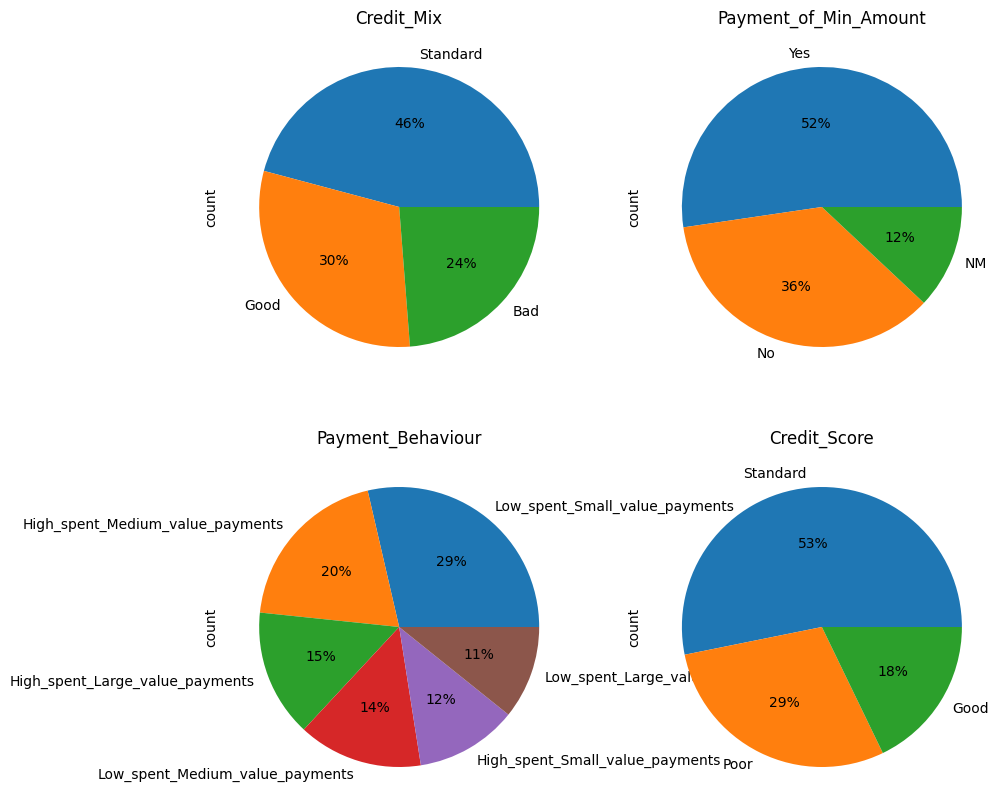

In [52]:
pie_plot(data, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],2,2)

<Axes: xlabel='Occupation', ylabel='count'>

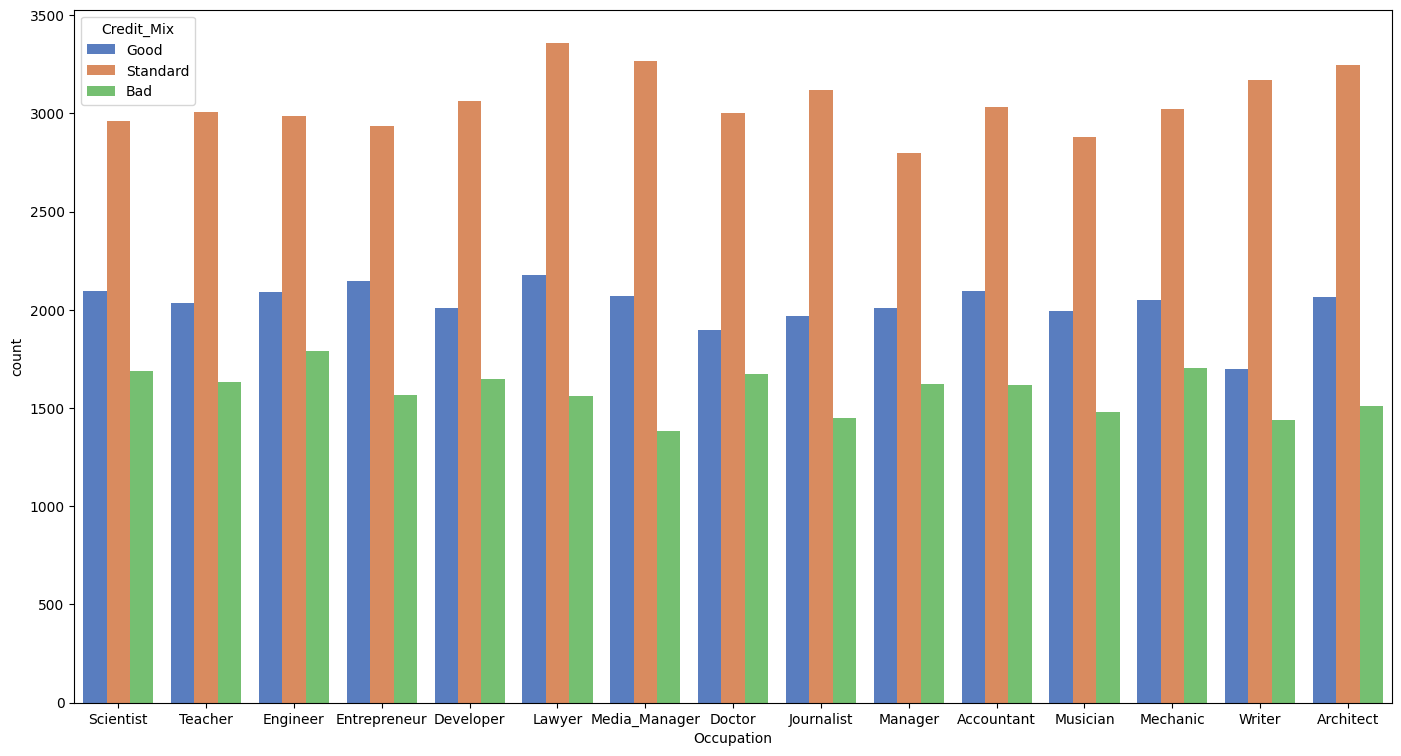

In [53]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data,x="Occupation",hue="Credit_Mix",palette="muted")

<Axes: xlabel='Occupation', ylabel='count'>

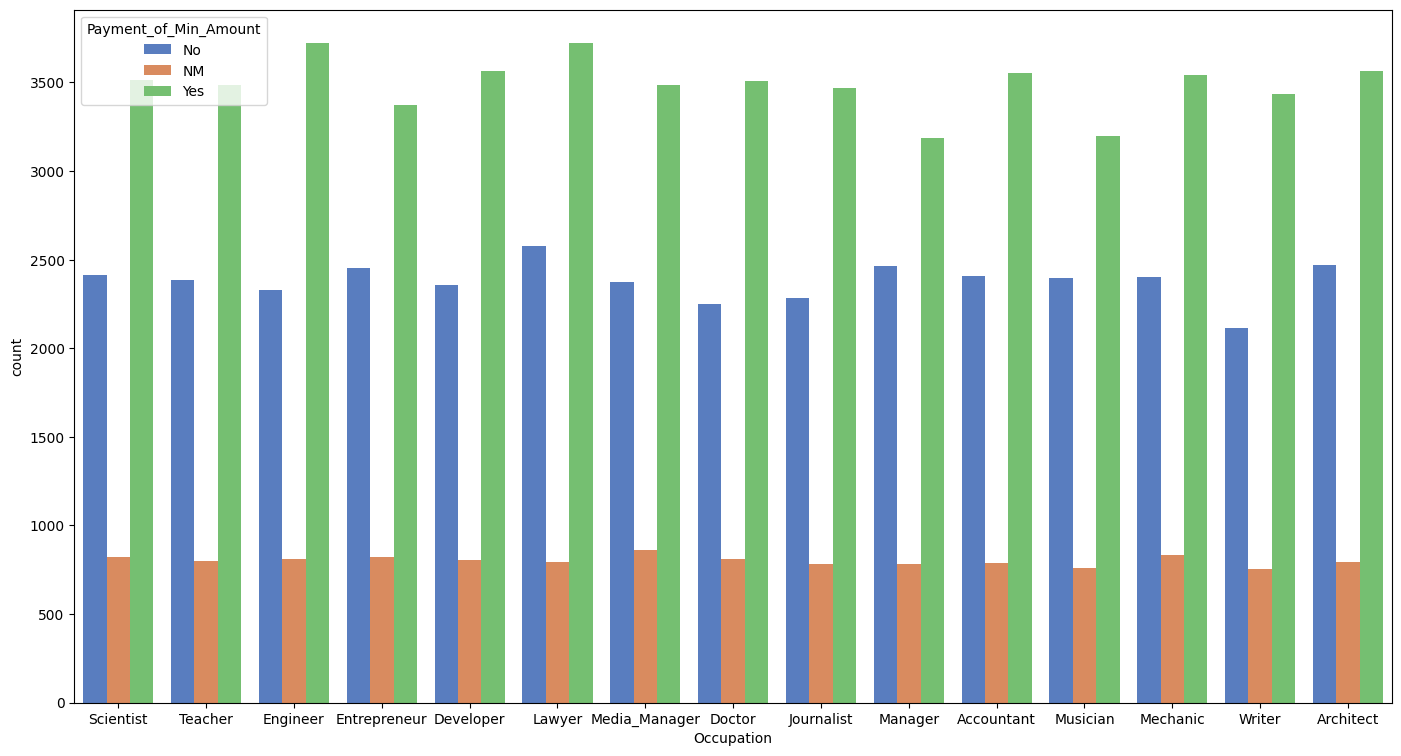

In [54]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data,x="Occupation",hue="Payment_of_Min_Amount",palette="muted")

<Axes: xlabel='Occupation', ylabel='count'>

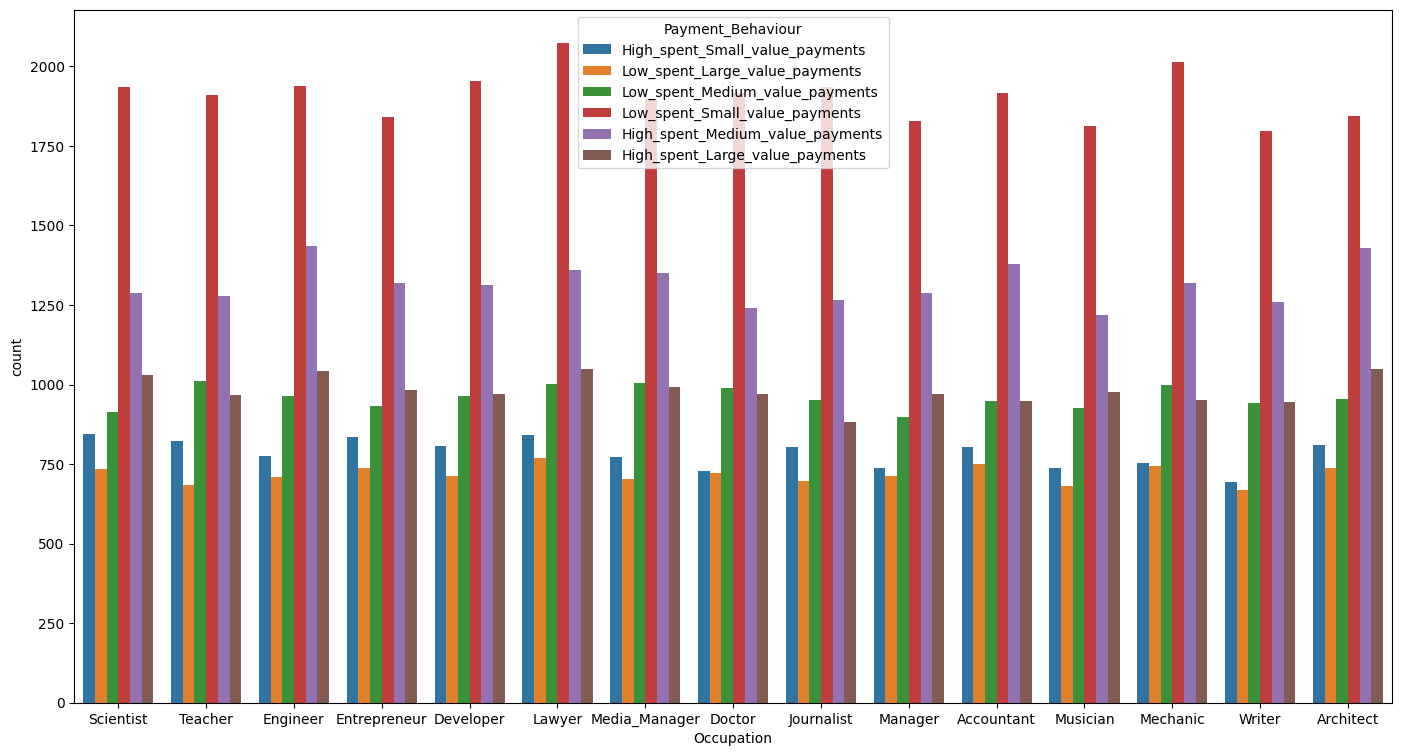

In [55]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data,x="Occupation",hue="Payment_Behaviour")

<Axes: xlabel='Occupation', ylabel='count'>

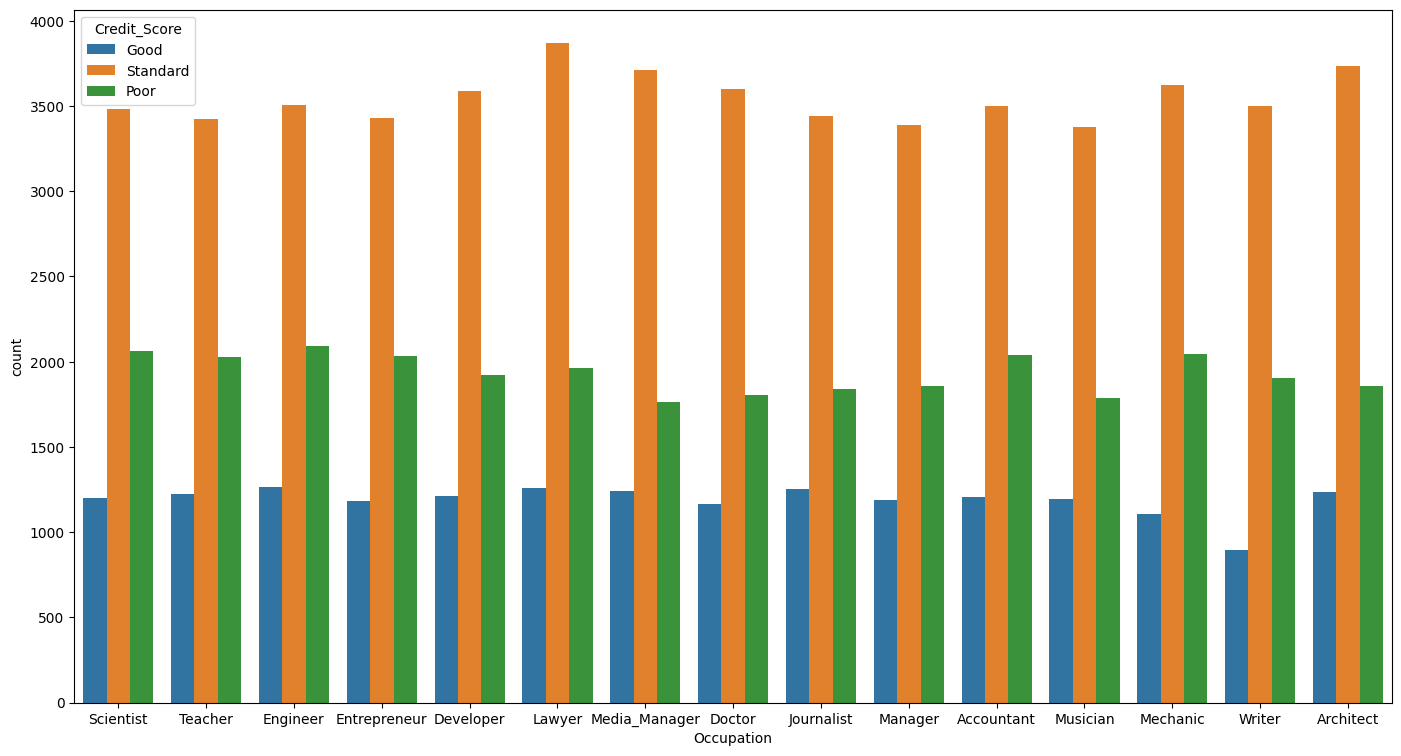

In [56]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data,x="Occupation",hue="Credit_Score")

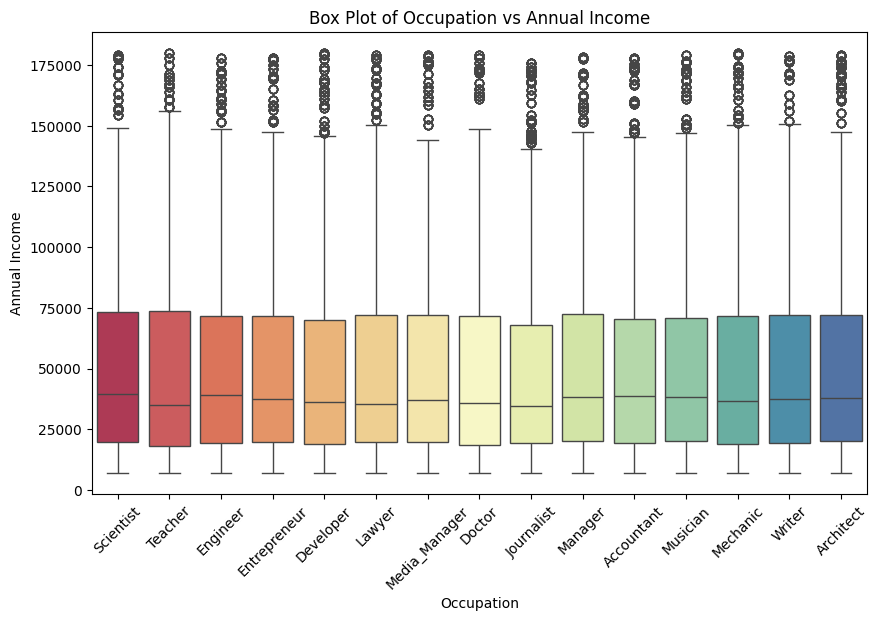

In [57]:
# Box Plot for Occupation vs Annual Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Annual_Income', data=data,palette="Spectral")
plt.title("Box Plot of Occupation vs Annual Income")
plt.xlabel("Occupation")
plt.ylabel("Annual Income")
plt.xticks(rotation=45)
plt.show()

In [58]:
data['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [59]:
data['Type_of_Loan'].value_counts()

Type_of_Loan
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgage Loan, Debt Consolidation Loan, and Student Loan                                                                     8
Debt Consolidation Loan, Auto Loan, Personal Loan, Debt Consolidation Loan, Student Loan, and Credit-Builder Loan                         8
Student Loan, Auto Loan, Student Loan, Credit-Builder Loan, Home Equity Loan, Debt Consolidation Loan, and Debt Consolidation Loan        8
Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan                                                                   8
Name: count, Length: 6261, dtype: int64

In [60]:
data['Num_Credit_Card'].nunique()

12

In [61]:
data['Num_Credit_Card'].unique()

array([ 4.,  5.,  1.,  7.,  6.,  8.,  3.,  9.,  2., 10., 11.,  0.])

#### 1.ID, Name and SSN ,month,customerid ,age,monthly inhand salary are not useful,Hence we can drop these columns.                                          
#### 2.Num_Credit_Card has value as zeros,In order to get credit score one should have minimum one credict card.
#### 3. Payment_of_Min_Amount has threee unique values "Yes","NO","NM".where "NM" should be changed.

#  **Data Pre Processing**




### Removing unnecessary columns which have less impact

In [62]:
data.drop('ID',axis=1,inplace=True)
data.drop('Customer_ID',axis=1,inplace=True)
data.drop('Month',axis=1,inplace=True)
data.drop('Name',axis=1,inplace=True)
data.drop('SSN',axis=1,inplace=True)
data.drop('Occupation',axis=1,inplace=True)
data.drop('Type_of_Loan',axis=1,inplace=True)
data.drop('Credit_Utilization_Ratio',axis=1,inplace=True)


#### Put Credit Card owned to atleast one

#### Divide type of loan in to different column

#### Changing "NM" in Payment_of_Min_Amount' column to "NO"

In [63]:
data['Payment_of_Min_Amount'].replace("NM","No",inplace = True)

In [64]:
data['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     47674
Name: count, dtype: int64

In [65]:
data.isnull().sum()

Age                        0
Annual_Income              0
Monthly_Inhand_Salary      0
Num_Bank_Accounts          0
Num_Credit_Card            0
Interest_Rate              0
Num_of_Loan                0
Delay_from_due_date        0
Num_of_Delayed_Payment     0
Changed_Credit_Limit       0
Num_Credit_Inquiries       0
Credit_Mix                 0
Outstanding_Debt           0
Credit_History_Age         0
Payment_of_Min_Amount      0
Total_EMI_per_month        0
Amount_invested_monthly    0
Payment_Behaviour          0
Monthly_Balance            0
Credit_Score               0
dtype: int64

### No null values present in the data set

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      100000 non-null  float64
 1   Annual_Income            100000 non-null  float64
 2   Monthly_Inhand_Salary    100000 non-null  float64
 3   Num_Bank_Accounts        100000 non-null  float64
 4   Num_Credit_Card          100000 non-null  float64
 5   Interest_Rate            100000 non-null  float64
 6   Num_of_Loan              100000 non-null  float64
 7   Delay_from_due_date      100000 non-null  float64
 8   Num_of_Delayed_Payment   100000 non-null  float64
 9   Changed_Credit_Limit     100000 non-null  float64
 10  Num_Credit_Inquiries     100000 non-null  float64
 11  Credit_Mix               100000 non-null  object 
 12  Outstanding_Debt         100000 non-null  float64
 13  Credit_History_Age       100000 non-null  float64
 14  Payme

Here we can see different types of loan is added to columns

### Outlier detection

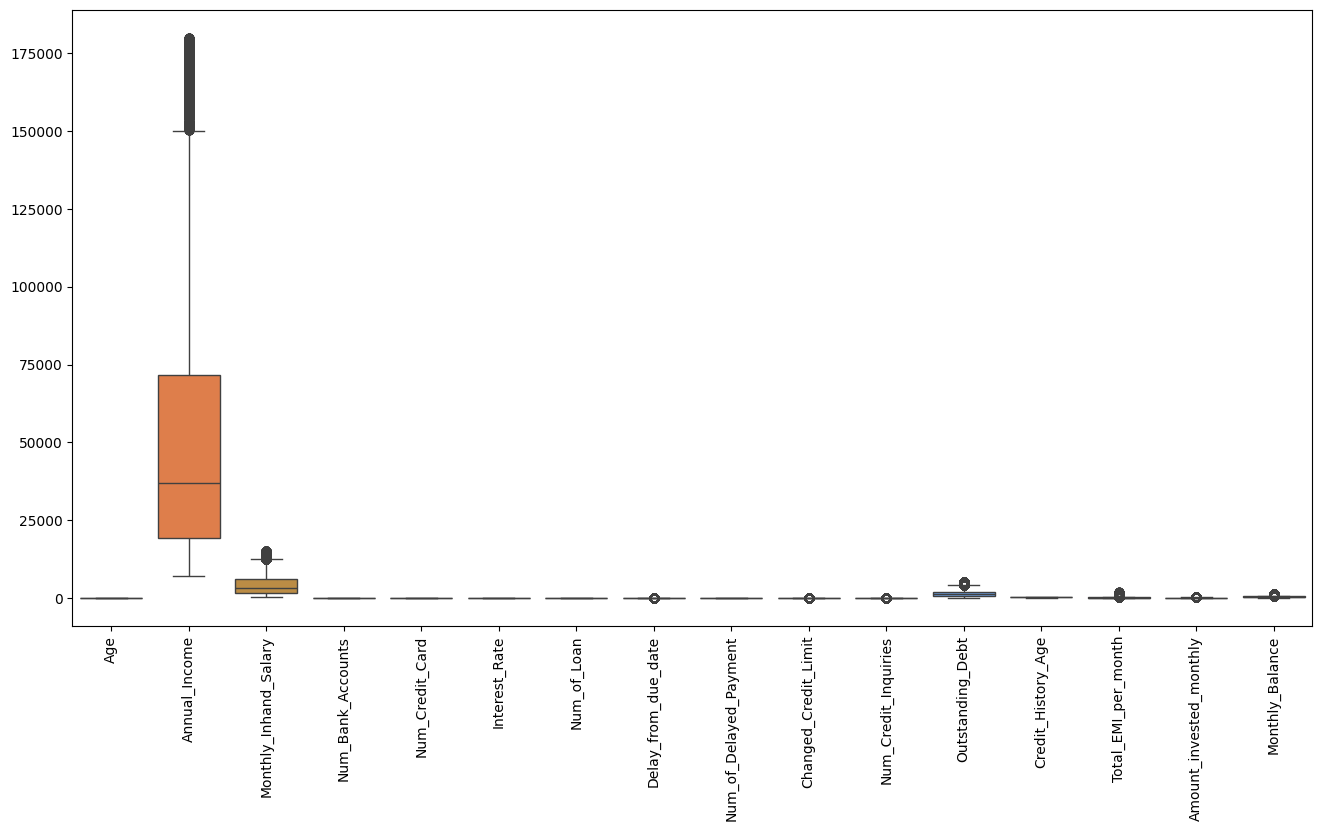

In [67]:
plt.figure(figsize=(16, 8))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

In [68]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

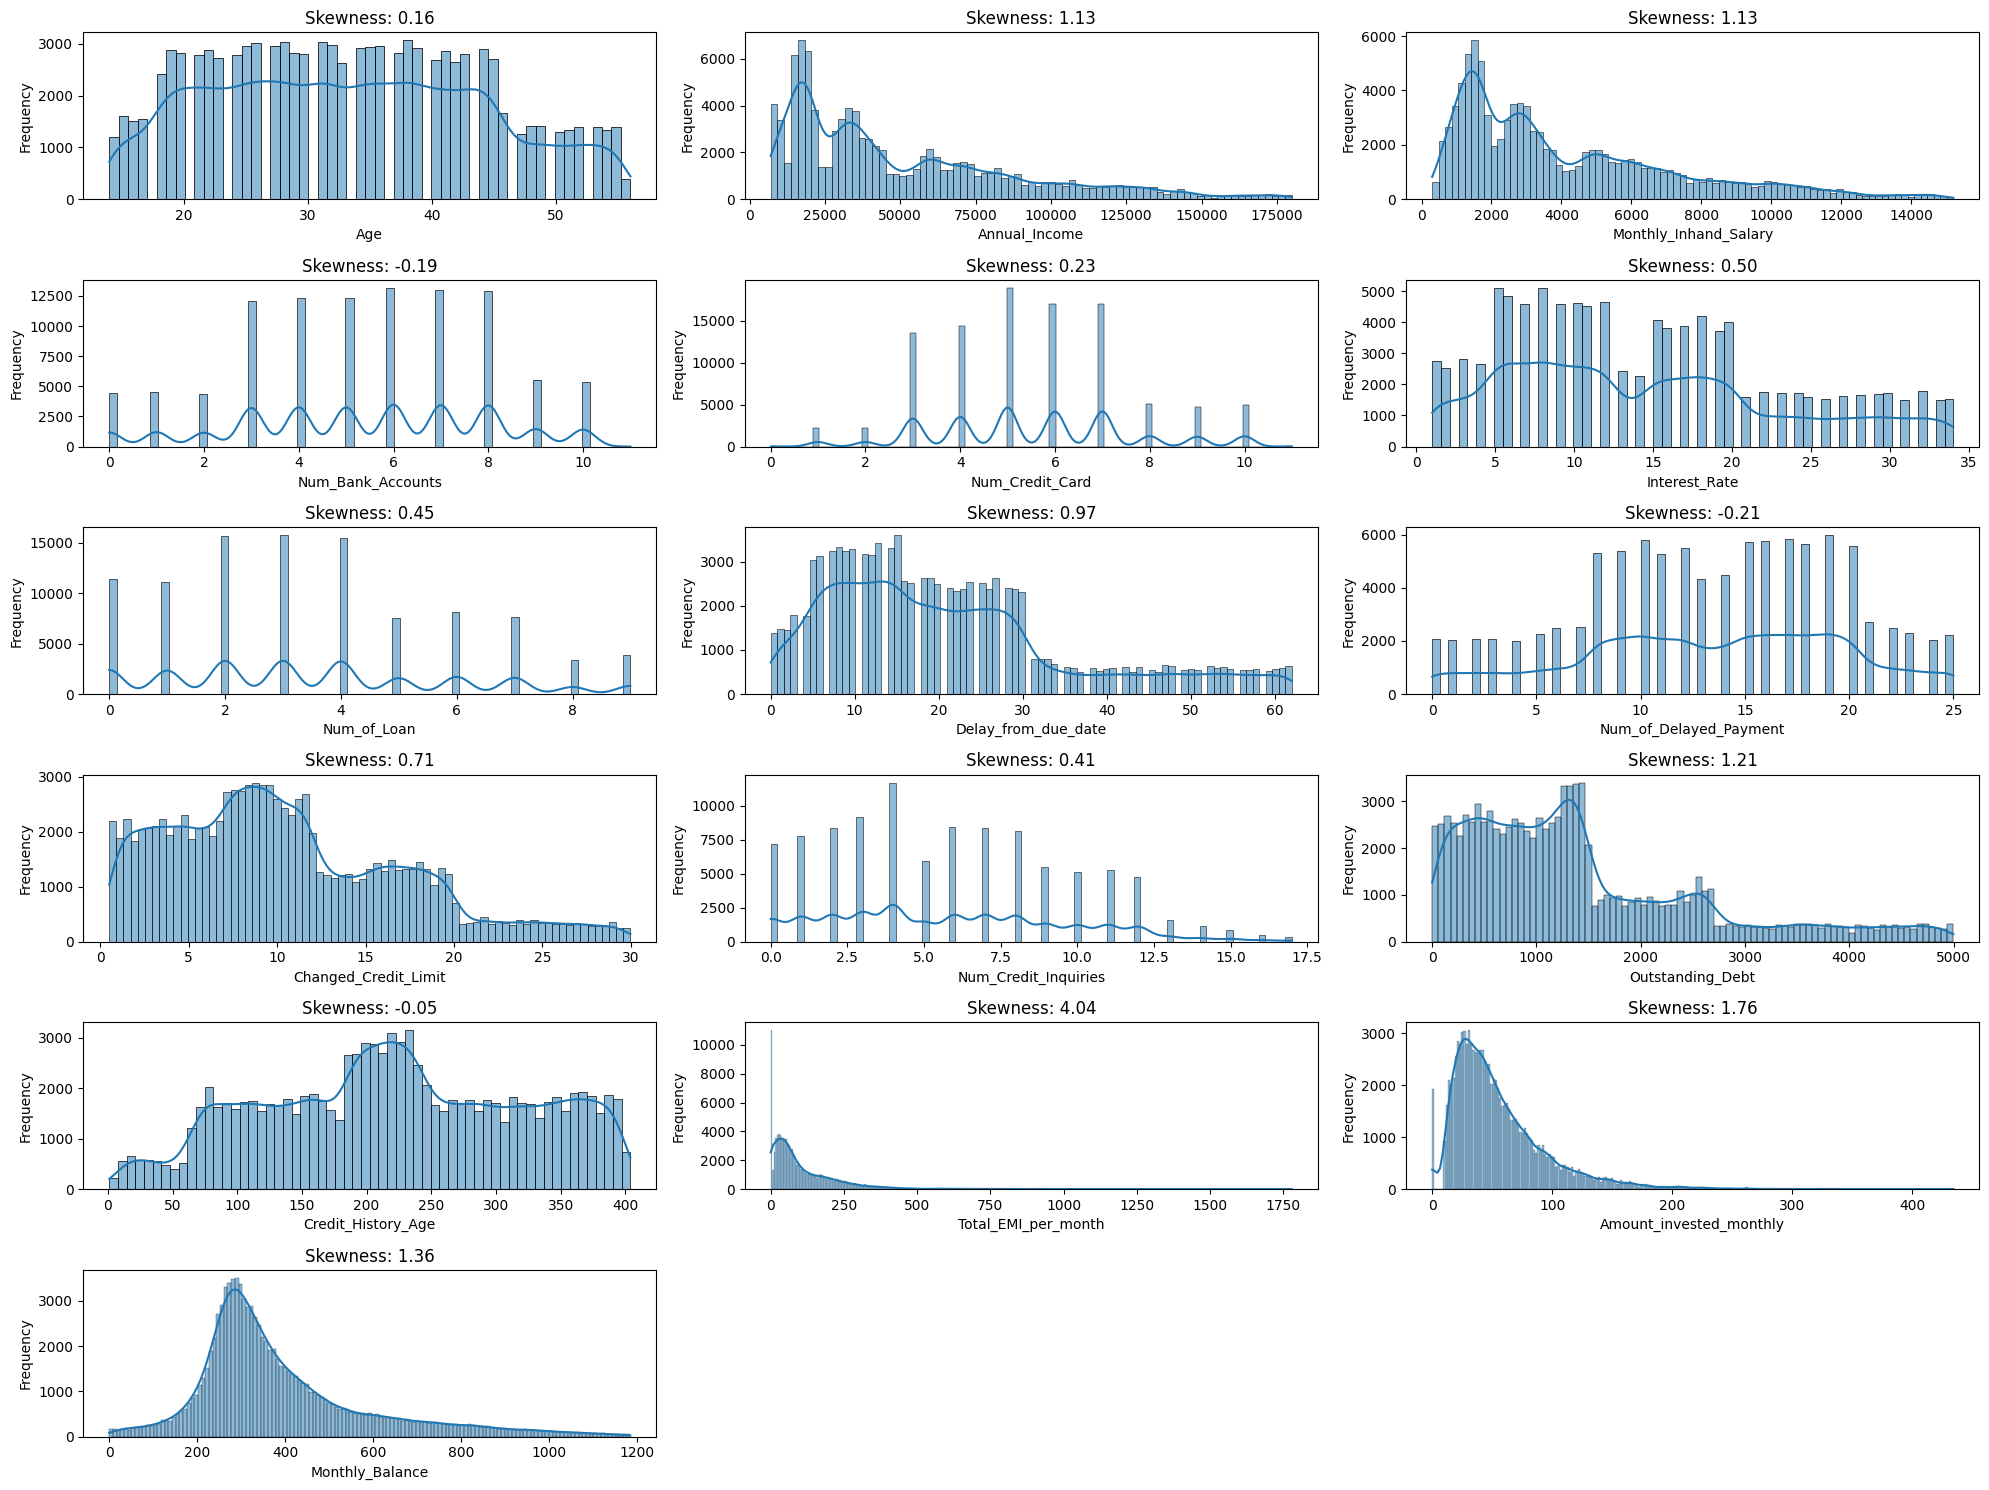

In [69]:
# PLOTTING SKEWNESS
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Skewness: {data[column].skew():.2f}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [70]:
outlier_columnss=['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

In [71]:
for i in outlier_columnss:
    print('Skewness of feature',i,':',data[i].skew())

Skewness of feature Annual_Income : 1.130222566741384
Skewness of feature Monthly_Inhand_Salary : 1.1286896104040092
Skewness of feature Delay_from_due_date : 0.9698402706723249
Skewness of feature Changed_Credit_Limit : 0.7083424268261724
Skewness of feature Num_Credit_Inquiries : 0.40682536214725384
Skewness of feature Outstanding_Debt : 1.2075361955699684
Skewness of feature Total_EMI_per_month : 4.041492244076896
Skewness of feature Amount_invested_monthly : 1.7610362306626115
Skewness of feature Monthly_Balance : 1.3556137797479813


In [72]:
freqgraph = data.select_dtypes(include=['float64', 'int64'])

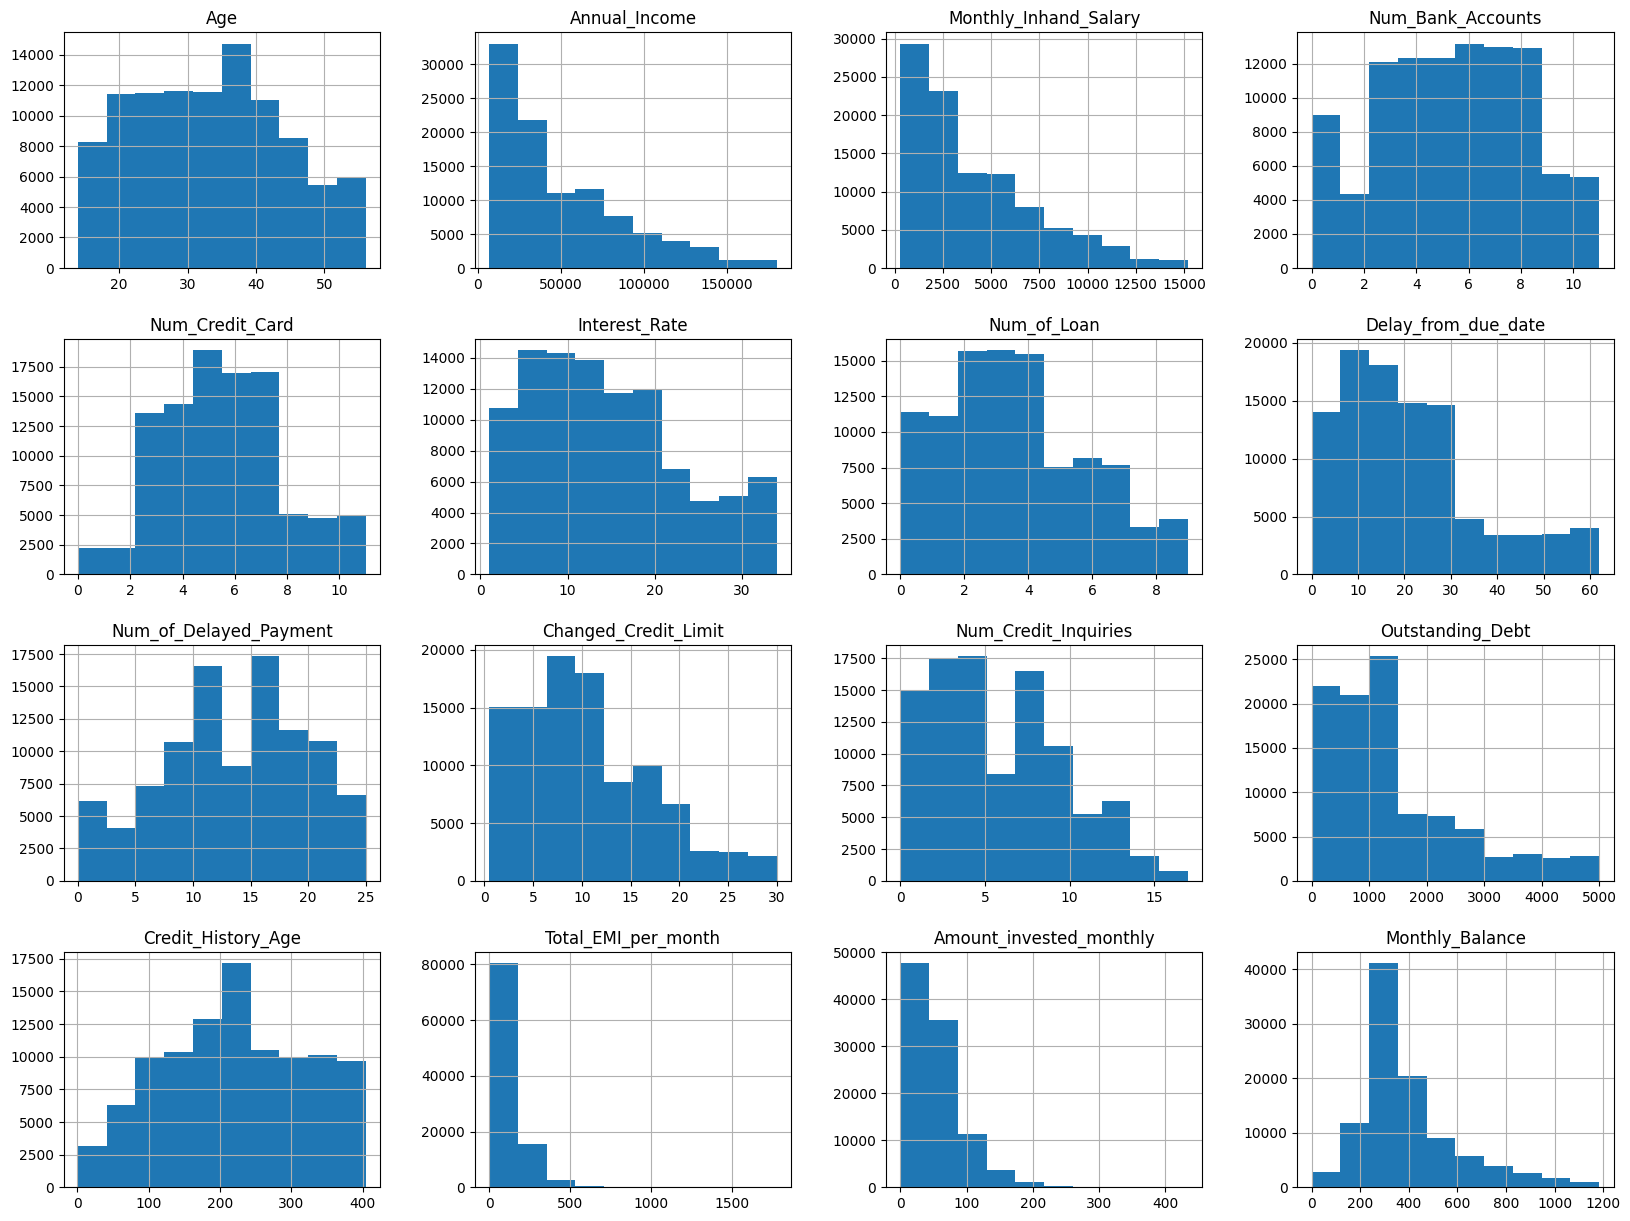

In [73]:
freqgraph.hist(figsize=(20,15))
plt.show()

Outliers are genuine, for this reason not performing IQR test.Performed log test also but no remarkable improvement

In [74]:
data.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  23.0       19114.12            1824.843333                3.0   
2  23.0       19114.12            1824.843333                3.0   
3  23.0       19114.12            1824.843333                3.0   
4  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                  3.0   
2              4.0            3.0          4.0                  3.0   
3              4.0            3.0          4.0                  5.0   
4              4.0            3.0          4.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                 11.27                   4.0   
1                     4.0                 11.27                   4.0   
2                     7.0                 11.27                   4.0   
3                     4.0                  6.27                   4.0   
4                     4.0                 11.27                   4.0   

  Credit_Mix  Outstanding_Debt  Credit_History_Age Payment_of_Min_Amount  \
0       Good            809.98               265.0                    No   
1       Good            809.98               266.0                    No   
2       Good            809.98               267.0                    No   
3       Good            809.98               268.0                    No   
4       Good            809.98               269.0                    No   

   Total_EMI_per_month  Amount_invested_monthly  \
0            49.574949                 21.46538   
1            49.574949                 21.46538   
2            49.574949                 21.46538   
3            49.574949                 21.46538   
4            49.574949                 21.46538   

                  Payment_Behaviour  Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments       312.494089         Good  
1    Low_spent_Large_value_payments       284.629162         Good  
2   Low_spent_Medium_value_payments       331.209863         Good  
3    Low_spent_Small_value_payments       223.451310         Good  
4  High_spent_Medium_value_payments       341.489231         Good

In [75]:
data.tail()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
99995  25.0       39628.99            3359.415833                4.0   
99996  25.0       39628.99            3359.415833                4.0   
99997  25.0       39628.99            3359.415833                4.0   
99998  25.0       39628.99            3359.415833                4.0   
99999  25.0       39628.99            3359.415833                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
99995              6.0            7.0          2.0                 23.0   
99996              6.0            7.0          2.0                 18.0   
99997              6.0            7.0          2.0                 27.0   
99998              6.0            7.0          2.0                 20.0   
99999              6.0            7.0          2.0                 18.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
99995                     7.0                  11.5                   3.0   
99996                     7.0                  11.5                   3.0   
99997                     6.0                  11.5                   3.0   
99998                     6.0                  11.5                   3.0   
99999                     6.0                  11.5                   3.0   

      Credit_Mix  Outstanding_Debt  Credit_History_Age Payment_of_Min_Amount  \
99995       Good            502.38               378.0                    No   
99996       Good            502.38               379.0                    No   
99997       Good            502.38               380.0                    No   
99998       Good            502.38               381.0                    No   
99999       Good            502.38               382.0                    No   

       Total_EMI_per_month  Amount_invested_monthly  \
99995            35.104023                24.028477   
99996            35.104023                24.028477   
99997            35.104023                24.028477   
99998            35.104023                24.028477   
99999            35.104023                24.028477   

                      Payment_Behaviour  Monthly_Balance Credit_Score  
99995   High_spent_Large_value_payments       479.866228         Poor  
99996  High_spent_Medium_value_payments       496.651610         Poor  
99997   High_spent_Large_value_payments       516.809083         Poor  
99998    Low_spent_Large_value_payments       319.164979     Standard  
99999  High_spent_Medium_value_payments       393.673696         Poor

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      100000 non-null  float64
 1   Annual_Income            100000 non-null  float64
 2   Monthly_Inhand_Salary    100000 non-null  float64
 3   Num_Bank_Accounts        100000 non-null  float64
 4   Num_Credit_Card          100000 non-null  float64
 5   Interest_Rate            100000 non-null  float64
 6   Num_of_Loan              100000 non-null  float64
 7   Delay_from_due_date      100000 non-null  float64
 8   Num_of_Delayed_Payment   100000 non-null  float64
 9   Changed_Credit_Limit     100000 non-null  float64
 10  Num_Credit_Inquiries     100000 non-null  float64
 11  Credit_Mix               100000 non-null  object 
 12  Outstanding_Debt         100000 non-null  float64
 13  Credit_History_Age       100000 non-null  float64
 14  Payme

##4 object columns are present.Apply label encoding to target variable and one hot encoding to remaining columns.

## **Encoding & Scaling**

In [77]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Label encoding target column

In [79]:
data['Credit_Score'] = le.fit_transform(data['Credit_Score'])

In [80]:
data=data.join(pd.get_dummies(data['Credit_Mix'],prefix='Credit_Mix').astype(int))
data=data.join(pd.get_dummies(data['Payment_of_Min_Amount'],prefix='Payment_of_Min_Amount').astype(int))
data=data.join(pd.get_dummies(data['Payment_Behaviour'],prefix='Payment_Behaviour').astype(int))

In [81]:
data.drop(['Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour'],axis=1,inplace=True)

In [82]:
# Display the transformed features
data.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  23.0       19114.12            1824.843333                3.0   
2  23.0       19114.12            1824.843333                3.0   
3  23.0       19114.12            1824.843333                3.0   
4  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                  3.0   
2              4.0            3.0          4.0                  3.0   
3              4.0            3.0          4.0                  5.0   
4              4.0            3.0          4.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Credit_Mix_Good  \
0                     7.0                 11.27  ...                1   
1                     4.0                 11.27  ...                1   
2                     7.0                 11.27  ...                1   
3                     4.0                  6.27  ...                1   
4                     4.0                 11.27  ...                1   

   Credit_Mix_Standard  Payment_of_Min_Amount_No  Payment_of_Min_Amount_Yes  \
0                    0                         1                          0   
1                    0                         1                          0   
2                    0                         1                          0   
3                    0                         1                          0   
4                    0                         1                          0   

   Payment_Behaviour_High_spent_Large_value_payments  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Payment_Behaviour_High_spent_Medium_value_payments  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  1    

   Payment_Behaviour_High_spent_Small_value_payments  \
0                                                  1   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Payment_Behaviour_Low_spent_Large_value_payments  \
0                                                 0   
1                                                 1   
2                                                 0   
3                                                 0   
4                                                 0   

   Payment_Behaviour_Low_spent_Medium_value_payments  \
0                                                  0   
1                                                  0   
2                                                  1   
3                                                  0   
4                                                  0   

   Payment_Behaviour_Low_spent_Small_value_payments  
0                                                 0  
1                                                 0  
2                                                 0  
3                                                 1  
4                                                 0  

[5 rows x 28 columns]

In [83]:
data.tail()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
99995  25.0       39628.99            3359.415833                4.0   
99996  25.0       39628.99            3359.415833                4.0   
99997  25.0       39628.99            3359.415833                4.0   
99998  25.0       39628.99            3359.415833                4.0   
99999  25.0       39628.99            3359.415833                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
99995              6.0            7.0          2.0                 23.0   
99996              6.0            7.0          2.0                 18.0   
99997              6.0            7.0          2.0                 27.0   
99998              6.0            7.0          2.0                 20.0   
99999              6.0            7.0          2.0                 18.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Credit_Mix_Good  \
99995                     7.0                  11.5  ...                1   
99996                     7.0                  11.5  ...                1   
99997                     6.0                  11.5  ...                1   
99998                     6.0                  11.5  ...                1   
99999                     6.0                  11.5  ...                1   

       Credit_Mix_Standard  Payment_of_Min_Amount_No  \
99995                    0                         1   
99996                    0                         1   
99997                    0                         1   
99998                    0                         1   
99999                    0                         1   

       Payment_of_Min_Amount_Yes  \
99995                          0   
99996                          0   
99997                          0   
99998                          0   
99999                          0   

       Payment_Behaviour_High_spent_Large_value_payments  \
99995                                                  1   
99996                                                  0   
99997                                                  1   
99998                                                  0   
99999                                                  0   

       Payment_Behaviour_High_spent_Medium_value_payments  \
99995                                                  0    
99996                                                  1    
99997                                                  0    
99998                                                  0    
99999                                                  1    

       Payment_Behaviour_High_spent_Small_value_payments  \
99995                                                  0   
99996                                                  0   
99997                                                  0   
99998                                                  0   
99999                                                  0   

       Payment_Behaviour_Low_spent_Large_value_payments  \
99995                                                 0   
99996                                                 0   
99997                                                 0   
99998                                                 1   
99999                                                 0   

       Payment_Behaviour_Low_spent_Medium_value_payments  \
99995                                                  0   
99996                                                  0   
99997                                                  0   
99998                                                  0   
99999                                                  0   

       Payment_Behaviour_Low_spent_Small_value_payments  
99995                                                 0  
99996                                                 0  
99997                                                 0  
99998                                                 0  
99999       

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  float64
 1   Annual_Income                                       100000 non-null  float64
 2   Monthly_Inhand_Salary                               100000 non-null  float64
 3   Num_Bank_Accounts                                   100000 non-null  float64
 4   Num_Credit_Card                                     100000 non-null  float64
 5   Interest_Rate                                       100000 non-null  float64
 6   Num_of_Loan                                         100000 non-null  float64
 7   Delay_from_due_date                                 100000 non-null  float64
 8   Num_of_Delayed_Payment                              100000 non-nu

In [85]:
#new_columns_out_final = ['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

In [86]:
data.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000  100000.000000          100000.000000      100000.000000   
mean       33.316340   50505.123449            4197.270835           5.368820   
std        10.764812   38299.422093            3186.432497           2.593314   
min        14.000000    7005.930000             303.645417           0.000000   
25%        24.000000   19342.972500            1626.594167           3.000000   
50%        33.000000   36999.705000            3095.905000           5.000000   
75%        42.000000   71683.470000            5957.715000           7.000000   
max        56.000000  179987.280000           15204.633333          11.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count    100000.000000   100000.00000  100000.000000         100000.00000   
mean          5.533570       14.53208       3.532880             21.08141   
std           2.067098        8.74133       2.446356             14.80456   
min           0.000000        1.00000       0.000000              0.00000   
25%           4.000000        7.00000       2.000000             10.00000   
50%           5.000000       13.00000       3.000000             18.00000   
75%           7.000000       20.00000       5.000000             28.00000   
max          11.000000       34.00000       9.000000             62.00000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Credit_Mix_Good  \
count           100000.000000         100000.000000  ...    100000.000000   
mean                13.313120             10.470323  ...         0.303840   
std                  6.237166              6.609481  ...         0.459917   
min                  0.000000              0.500000  ...         0.000000   
25%                  9.000000              5.380000  ...         0.000000   
50%                 14.000000              9.400000  ...         0.000000   
75%                 18.000000             14.850000  ...         1.000000   
max                 25.000000             29.980000  ...         1.000000   

       Credit_Mix_Standard  Payment_of_Min_Amount_No  \
count        100000.000000             100000.000000   
mean              0.458480                  0.476740   
std               0.498276                  0.499461   
min               0.000000                  0.000000   
25%               0.000000                  0.000000   
50%               0.000000                  0.000000   
75%               1.000000                  1.000000   
max               1.000000                  1.000000   

       Payment_of_Min_Amount_Yes  \
count              100000.000000   
mean                    0.523260   
std                     0.499461   
min                     0.000000   
25%                     0.000000   
50%                     1.000000   
75%                     1.000000   
max                     1.000000   

       Payment_Behaviour_High_spent_Large_value_payments  \
count                                      100000.000000   
mean                                            0.147260   
std                                             0.354367   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                             1.000000   

       Payment_Behaviour_High_spent_Medium_value_payments  \
count                                      100000.000000    
mean                                            0.197380    
std                                             0.398024    
min                                             0.000000    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                     

In [87]:
data.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_History_Age',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'],
      dtype='object')

### Categorical columns are encoded completly

### Checking correalation

In [88]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

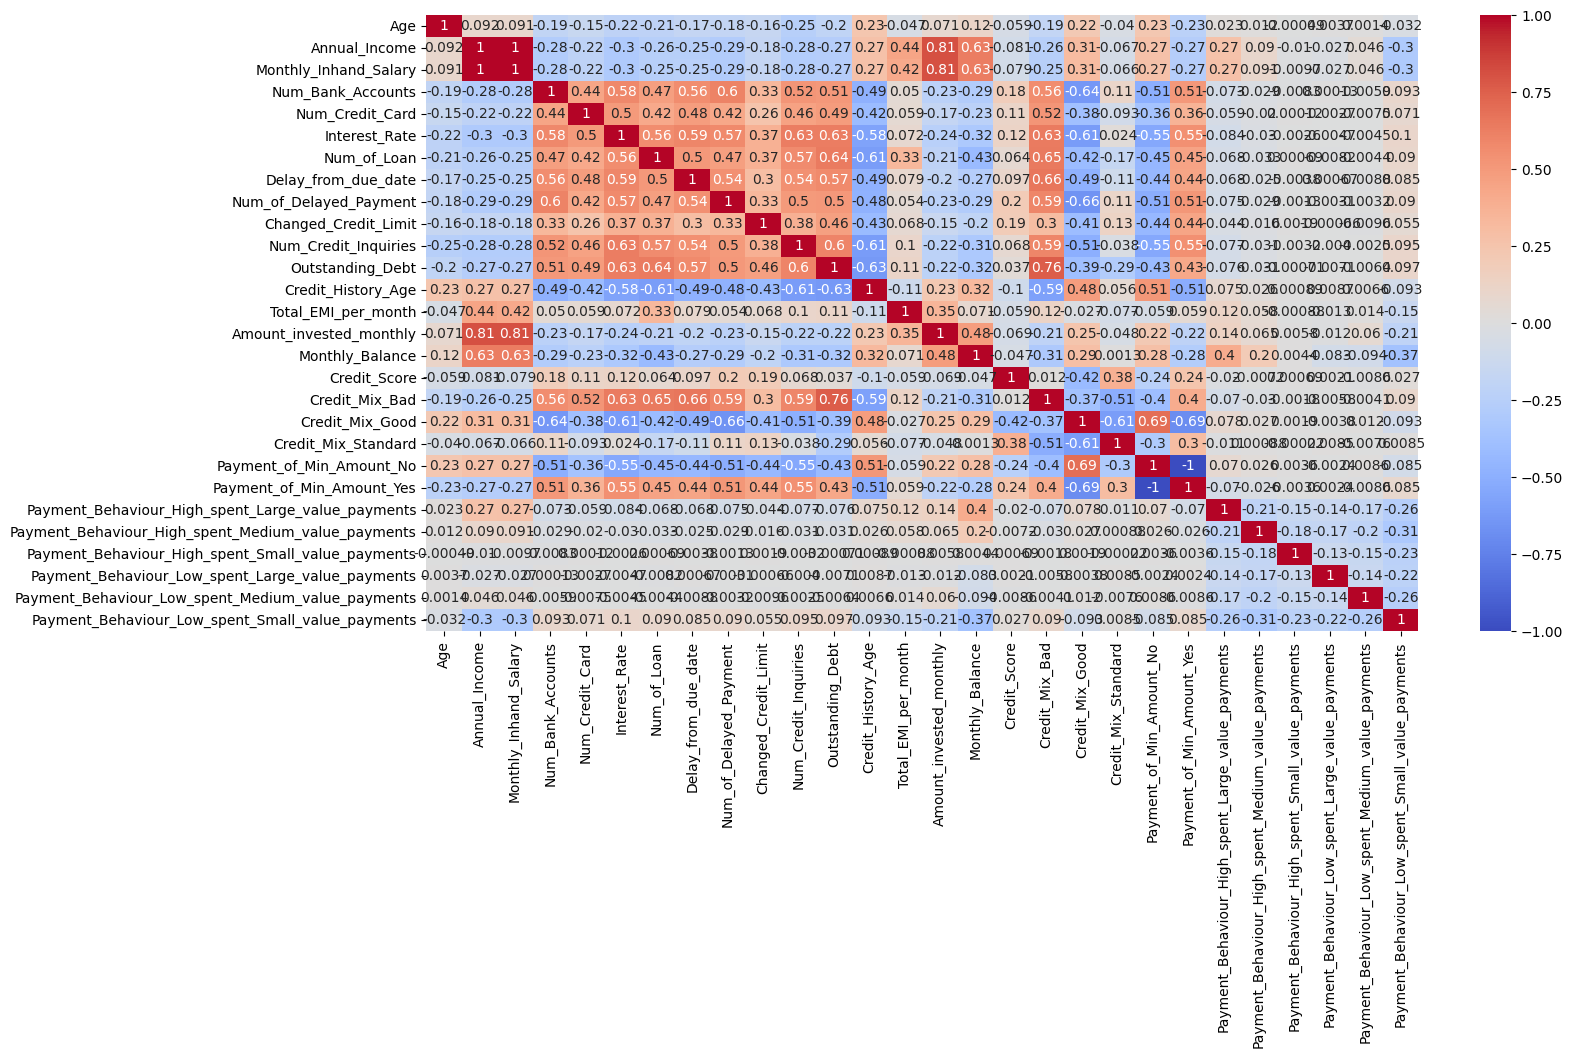

In [89]:
# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### **Its clear from the heapmap that Annual Income and Monthly Inhand Salary highly correlared**

In [90]:
# Dropping MOnthly in hand Salary
data.drop('Monthly_Inhand_Salary',axis=1,inplace=True)

In [91]:
data.head(3)

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0  23.0       19114.12                3.0              4.0            3.0   
1  23.0       19114.12                3.0              4.0            3.0   
2  23.0       19114.12                3.0              4.0            3.0   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0          4.0                  3.0                     7.0   
1          4.0                  3.0                     4.0   
2          4.0                  3.0                     7.0   

   Changed_Credit_Limit  Num_Credit_Inquiries  ...  Credit_Mix_Good  \
0                 11.27                   4.0  ...                1   
1                 11.27                   4.0  ...                1   
2                 11.27                   4.0  ...                1   

   Credit_Mix_Standard  Payment_of_Min_Amount_No  Payment_of_Min_Amount_Yes  \
0                    0                         1                          0   
1                    0                         1                          0   
2                    0                         1                          0   

   Payment_Behaviour_High_spent_Large_value_payments  \
0                                                  0   
1                                                  0   
2                                                  0   

   Payment_Behaviour_High_spent_Medium_value_payments  \
0                                                  0    
1                                                  0    
2                                                  0    

   Payment_Behaviour_High_spent_Small_value_payments  \
0                                                  1   
1                                                  0   
2                                                  0   

   Payment_Behaviour_Low_spent_Large_value_payments  \
0                                                 0   
1                                                 1   
2                                                 0   

   Payment_Behaviour_Low_spent_Medium_value_payments  \
0                                                  0   
1                                                  0   
2                                                  1   

   Payment_Behaviour_Low_spent_Small_value_payments  
0                                                 0  
1                                                 0  
2                                                 0  

[3 rows x 27 columns]

In [92]:
from sklearn.feature_selection import mutual_info_classif

In [93]:
y = data['Credit_Score']
x = data.drop(columns=['Credit_Score'])
mi_scores = mutual_info_classif(x, y)
sorted_mi_scores = sorted(zip(x.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]
for i, score in enumerate(mi_scores):
    print(f"Feature '{x.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.026494856874429873
Feature 'Annual_Income': Mutual Information Score = 0.6236085467446877
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.10339248667854983
Feature 'Num_Credit_Card': Mutual Information Score = 0.10773189679602191
Feature 'Interest_Rate': Mutual Information Score = 0.17135873761994347
Feature 'Num_of_Loan': Mutual Information Score = 0.08802041651694603
Feature 'Delay_from_due_date': Mutual Information Score = 0.12268113615610132
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.08904835828805435
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.10241293721459677
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.11833406745902986
Feature 'Outstanding_Debt': Mutual Information Score = 0.6133674257949675
Feature 'Credit_History_Age': Mutual Information Score = 0.10297986695636085
Feature 'Total_EMI_per_month': Mutual Information Score = 0.565972414834879
Feature 'Amount_invested_month

In [94]:
# Standard Scaling for numerical columns
std = StandardScaler()

In [95]:
scalar_data=data.drop('Credit_Score',axis=1)
scalar_data=std.fit_transform(scalar_data)

In [96]:
scalar_data=pd.DataFrame(scalar_data)

In [97]:
scalar_data.describe()

0             1             2             3             4   \
count  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
mean   3.050715e-16  2.592060e-16 -1.426770e-16 -4.860112e-17 -6.465939e-17   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min   -1.794405e+00 -1.135772e+00 -2.070265e+00 -2.676988e+00 -1.548065e+00   
25%   -8.654482e-01 -8.136495e-01 -9.134380e-01 -7.418987e-01 -8.616672e-01   
50%   -2.938663e-02 -3.526290e-01 -1.422203e-01 -2.581264e-01 -1.752694e-01   
75%    8.066749e-01  5.529705e-01  6.289975e-01  7.094183e-01  6.255281e-01   
max    2.107215e+00  3.380803e+00  2.171433e+00  2.644508e+00  2.227123e+00   

                 5             6             7             8             9   \
count  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
mean   4.831691e-18 -1.201528e-16  6.366463e-17 -1.587352e-16 -7.190692e-17   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min   -1.444147e+00 -1.423988e+00 -2.134493e+00 -1.508496e+00 -1.499106e+00   
25%   -6.266004e-01 -7.485170e-01 -6.915226e-01 -7.701586e-01 -7.234721e-01   
50%   -2.178271e-01 -2.081403e-01  1.101275e-01 -1.619384e-01 -2.063831e-01   
75%    5.997194e-01  4.673306e-01  7.514476e-01  6.626389e-01  5.692503e-01   
max    2.234812e+00  2.763932e+00  1.873758e+00  2.951786e+00  2.896151e+00   

       ...            16            17            18            19  \
count  ...  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
mean   ...  1.925571e-17 -5.549339e-17  6.487255e-17  1.369926e-16   
std    ...  1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min    ... -6.606447e-01 -9.201380e-01 -9.545134e-01 -1.047654e+00   
25%    ... -6.606447e-01 -9.201380e-01 -9.545134e-01 -1.047654e+00   
50%    ... -6.606447e-01 -9.201380e-01 -9.545134e-01  9.545134e-01   
75%    ...  1.513673e+00  1.086794e+00  1.047654e+00  9.545134e-01   
max    ...  1.513673e+00  1.086794e+00  1.047654e+00  9.545134e-01   

                 20            21            22            23            24  \
count  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
mean  -1.051603e-17 -3.325340e-17  5.627498e-17 -4.277467e-17  3.950618e-17   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min   -4.155603e-01 -4.959028e-01 -3.651360e-01 -3.471830e-01 -4.101349e-01   
25%   -4.155603e-01 -4.959028e-01 -3.651360e-01 -3.471830e-01 -4.101349e-01   
50%   -4.155603e-01 -4.959028e-01 -3.651360e-01 -3.471830e-01 -4.101349e-01   
75%   -4.155603e-01 -4.959028e-01 -3.651360e-01 -3.471830e-01 -4.101349e-01   
max    2.406389e+00  2.016524e+00  2.738706e+00  2.880325e+00  2.438222e+00   

                 25  
count  1.000000e+05  
mean  -2.415845e-17  
std    1.000005e+00  
min   -6.331462e-01  
25%   -6.331462e-01  
50%   -6.331462e-01  
75%    1.579414e+00  
max    1.579414e+00  

[8 rows x 26 columns]

##**Train_test_split_test**

### Split the data: Create training and testing sets.For model development


In [103]:
y = data.Credit_Score
x = data.drop('Credit_Score',axis=1)

In [104]:
x.head()

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0  23.0       19114.12                3.0              4.0            3.0   
1  23.0       19114.12                3.0              4.0            3.0   
2  23.0       19114.12                3.0              4.0            3.0   
3  23.0       19114.12                3.0              4.0            3.0   
4  23.0       19114.12                3.0              4.0            3.0   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0          4.0                  3.0                     7.0   
1          4.0                  3.0                     4.0   
2          4.0                  3.0                     7.0   
3          4.0                  5.0                     4.0   
4          4.0                  6.0                     4.0   

   Changed_Credit_Limit  Num_Credit_Inquiries  ...  Credit_Mix_Good  \
0                 11.27                   4.0  ...                1   
1                 11.27                   4.0  ...                1   
2                 11.27                   4.0  ...                1   
3                  6.27                   4.0  ...                1   
4                 11.27                   4.0  ...                1   

   Credit_Mix_Standard  Payment_of_Min_Amount_No  Payment_of_Min_Amount_Yes  \
0                    0                         1                          0   
1                    0                         1                          0   
2                    0                         1                          0   
3                    0                         1                          0   
4                    0                         1                          0   

   Payment_Behaviour_High_spent_Large_value_payments  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Payment_Behaviour_High_spent_Medium_value_payments  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  1    

   Payment_Behaviour_High_spent_Small_value_payments  \
0                                                  1   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Payment_Behaviour_Low_spent_Large_value_payments  \
0                                                 0   
1                                                 1   
2                                                 0   
3                                                 0   
4                                                 0   

   Payment_Behaviour_Low_spent_Medium_value_payments  \
0                                                  0   
1                                                  0   
2                                                  1   
3                                                  0   
4                                                  0   

   Payment_Behaviour_Low_spent_Small_value_payments  
0                                                 0  
1                                                 0  
2                                                 0  
3                                                 1  
4                                                 0  

[5 rows x 26 columns]

In [105]:
x.describe()

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
count  100000.000000  100000.000000      100000.000000    100000.000000   
mean       33.316340   50505.123449           5.368820         5.533570   
std        10.764812   38299.422093           2.593314         2.067098   
min        14.000000    7005.930000           0.000000         0.000000   
25%        24.000000   19342.972500           3.000000         4.000000   
50%        33.000000   36999.705000           5.000000         5.000000   
75%        42.000000   71683.470000           7.000000         7.000000   
max        56.000000  179987.280000          11.000000        11.000000   

       Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count   100000.00000  100000.000000         100000.00000   
mean        14.53208       3.532880             21.08141   
std          8.74133       2.446356             14.80456   
min          1.00000       0.000000              0.00000   
25%          7.00000       2.000000             10.00000   
50%         13.00000       3.000000             18.00000   
75%         20.00000       5.000000             28.00000   
max         34.00000       9.000000             62.00000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count           100000.000000         100000.000000         100000.000000   
mean                13.313120             10.470323              5.798250   
std                  6.237166              6.609481              3.867826   
min                  0.000000              0.500000              0.000000   
25%                  9.000000              5.380000              3.000000   
50%                 14.000000              9.400000              5.000000   
75%                 18.000000             14.850000              8.000000   
max                 25.000000             29.980000             17.000000   

       ...  Credit_Mix_Good  Credit_Mix_Standard  Payment_of_Min_Amount_No  \
count  ...    100000.000000        100000.000000             100000.000000   
mean   ...         0.303840             0.458480                  0.476740   
std    ...         0.459917             0.498276                  0.499461   
min    ...         0.000000             0.000000                  0.000000   
25%    ...         0.000000             0.000000                  0.000000   
50%    ...         0.000000             0.000000                  0.000000   
75%    ...         1.000000             1.000000                  1.000000   
max    ...         1.000000             1.000000                  1.000000   

       Payment_of_Min_Amount_Yes  \
count              100000.000000   
mean                    0.523260   
std                     0.499461   
min                     0.000000   
25%                     0.000000   
50%                     1.000000   
75%                     1.000000   
max                     1.000000   

       Payment_Behaviour_High_spent_Large_value_payments  \
count                                      100000.000000   
mean                                            0.147260   
std                                             0.354367   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                             1.000000   

       Payment_Behaviour_High_spent_Medium_value_payments  \
count                                      100000.000000    
mean                                            0.197380    
std                                             0.398024    
min                                             0.000000    
25%                                             0.000000    
50%                                             0.000000    
75%                                             0.000000    
max                                             1

In [106]:
from sklearn.model_selection import train_test_split

##First, split the data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##Then, split the train set into train and validation.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

In [108]:
print(x_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(64000, 26)
(64000,)
Credit_Score
2    33948
1    18597
0    11455
Name: count, dtype: int64


# **WEEK 2**

###**Objective**: Build and train the credit score classification model

In [110]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import pickle

## 1. Logistic Regression

In [111]:
log_reg=LogisticRegression(random_state=42)
# Train the model
log_reg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.54375


## 2.Decision Tree

In [112]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.74395


## 3.Random Forest Classifier

In [113]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8082


## 6. KNN

In [114]:
knn=KNeighborsClassifier(n_neighbors = 13, metric= 'euclidean', n_jobs= -1, p= 1,weights= 'distance')
# Train the model
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.74785


###CHOOSING RANDOM FOREST CLASSIFIER as selected model.

##KFold Cross Validation

In [115]:
kfold_validator=KFold(n_splits=5, shuffle=True, random_state=42)

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
scores = cross_val_score(model, x_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

model.fit(x_train, y_train)
y_val_pred = model.predict(x_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)


Cross-validation scores: [0.79554687 0.80195313 0.80789062 0.79617187 0.800625  ]
Average cross-validation score: 0.8004374999999999
Validation Accuracy: 0.8080625


In [117]:
rf_clf=RandomForestClassifier(n_estimators=100,random_state=42)
rf_clf.fit(x_train,y_train)
rf_pred=rf_clf.predict(x_test)

In [118]:
metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
table= pd.DataFrame([[rf_clf.score(x_train,y_train)],[accuracy_score(y_test,rf_pred)],[precision_score(y_test,rf_pred,average='macro')],[recall_score(y_test,rf_pred,average='macro')],[f1_score(y_test,rf_pred,average='macro')]],columns=['Random Forest Classifier'])
table.index=metric
table

Random Forest Classifier
Train Accuracy                  0.999953
Test Accuracy                   0.808000
Precision                       0.800413
Recall                          0.797573
F1 Score                        0.798782

# HYPER PARAMETER TUNING

## Hyperparameter Tuning to find the best/to enhance model performance

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, randint(5, 20)],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Initialize the model
model = RandomForestClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit to the training data
random_search.fit(x_train, y_train)

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 195}
Test Accuracy: 0.8076


In [121]:
 ##Predict on train and test sets
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)

In [122]:
# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')  # Adjust 'average' as needed
recall = recall_score(y_test, y_test_pred, average='weighted')  # Adjust 'average' as needed
f1 = f1_score(y_test, y_test_pred, average='weighted')  # Adjust 'average' as needed

# Print results
print("Train Accuracy: {:.6f}".format(train_accuracy))
print("Test Accuracy: {:.6f}".format(test_accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1 Score: {:.6f}".format(f1))


Train Accuracy: 0.954313
Test Accuracy: 0.807600
Precision: 0.807558
Recall: 0.807600
F1 Score: 0.807460


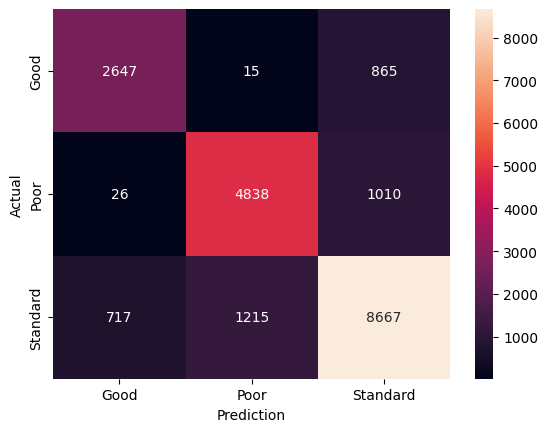

In [123]:
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Good','Poor','Standard'],
            yticklabels=['Good','Poor','Standard'])
plt.xlabel('Prediction',fontsize=10)
plt.ylabel('Actual',fontsize=10)
plt.show()

In [124]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      3527
           1       0.80      0.83      0.81      5874
           2       0.82      0.82      0.82     10599

    accuracy                           0.81     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.81      0.81      0.81     20000



metric values are good

## Prediction

In [125]:
x_train.shape

(64000, 26)

In [126]:
prediction=best_model.predict([[19114.12,	1824.843333,3.0,	4.0,	3.0	,4.0,	3.0	,7.0,	11.27,	4.0	,2,	809.98,	26.822620,	265.0,	49.574949	,21.46538	,312.494089,0	,1	,0	,0,	0	,1,	0	,0,0]])
prediction[0]

2

In [127]:
prediction=best_model.predict([[39628.99,3359.415833,	4.0	,6.0,	7.0,	2.0	,23.0	,7.0,	11.5,	3.0,	2,	502.38,	34.663572,	378.0,	35.104023,	24.028477	,479.866228,	1	,0,	1	,0,	1	,0,	0	,0	,0]])


In [128]:
prediction[0]

2

In [129]:
prediction=best_model.predict([[39628.99,	3359.415833	,4.0	,6.0,	7.0,	2.0	,18.0	,6.0,	11.5	,3.0	,2,	502.38	,34.192463,	382.0	,35.104023,24.028477,	393.673696	,1	,0	,1,	0,	0,	1,	0,	0	,0]])
prediction[0]

2

In [130]:
prediction=best_model.predict([[57983.12,	4720.927	,9.0	,8.0,	31.0,	8.0	,53.0	,21.0,	7.27	,17.0	,1,	3532.83	,32.32177,	147.0	,200.4326,159.2345,	275.2345,0	,0	,1,	0,	1,	0,	0,	0	,0]])
prediction[0]

1